### 11장 데이터 다루기

#### 1. 딥러닝과 데이터
- 좋은 데이터: 알아내고자 하는 정보를 잘 담고 있는 데이터

#### 2. 피마 인디언 데이터 분석하기

In [2]:
# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('../dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

#### 3. pandas를 활용한 데이터 조사

In [3]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


#### 4. 데이터 가공하기

- 임신 횟수당 당뇨병 발병 확률
    - ```group by```: pregnant 정보를 기준으로 하는 새 그룹을 만듦
    - ```as_index=False```: pregnat 정보 옆에 새로운 index를 만듦
    - ```mean()```: 평균 구하기
    - ```sort_values()```: pregnant column을 ascending으로 정리

In [7]:
# 임신 횟수와 당뇨병 발병 확률
print(df[['pregnant', 'class']]
      .groupby(['pregnant'], as_index=False)
      .mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


#### 5. matplotlib를 이용해 그래프로 표현하기
- ```matplotlib```: 파이썬에서 그래프를 그릴 때 가장 많이 사용되는 라이브러리
- ```seaborn```: 각 정보끼리 어떤 상관관계가 있는지 확인

In [8]:
# 그래프의 크기 결정
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

- **seaborn 라이브러리**
    - ```heatmap()```: 각 항목 간의 상관관계를 나타내 준다.
        - 두 항목씩 짝을 짓고 어떤 패턴으로 변화하는지 관찰
        - 두 항목이 전혀 다른 패턴으로 변화(0), 비슷한 패턴으로 변화(1에 근사)

<AxesSubplot:>

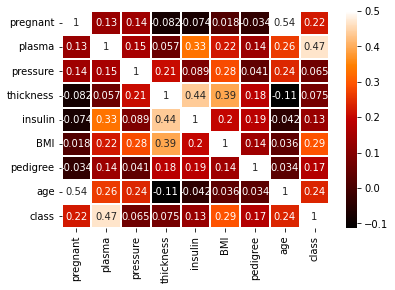

In [9]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

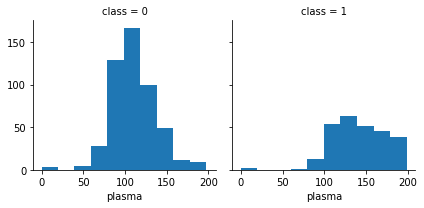

In [10]:
# plasma와 class 항목과 가장 상관관계가 높음

grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

#### 6. 피마 인디언의 당뇨병 예측 실행

- seed 값을 설정: 랜덤 테이블 중에서 몇 번째 테이블을 불러와 쓸지를 정하는 것

In [15]:
import numpy as np
import tensorflow as tf

# seed 값 생성
np.random.seed(3)
tf.random.set_seed(3)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
# 데이터 로드
dataset = np.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [19]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 131us/sample - loss: 0.4944 - accuracy: 0.7201
Epoch 2/200
768/768 [==============================] - 0s 126us/sample - loss: 0.4915 - accuracy: 0.7305
Epoch 3/200
768/768 [==============================] - 0s 134us/sample - loss: 0.4905 - accuracy: 0.7318
Epoch 4/200
768/768 [==============================] - 0s 126us/sample - loss: 0.4913 - accuracy: 0.7305
Epoch 5/200
768/768 [==============================] - 0s 123us/sample - loss: 0.4892 - accuracy: 0.7370
Epoch 6/200
768/768 [==============================] - 0s 124us/sample - loss: 0.4900 - accuracy: 0.7370
Epoch 7/200
768/768 [==============================] - 0s 126us/sample - loss: 0.4944 - accuracy: 0.7292
Epoch 8/200
768/768 [==============================] - 0s 121us/sample - loss: 0.4975 - accuracy: 0.7214
Epoch 9/200
768/768 [==============================] - 0s 137us/sample - loss: 0.4933 - accuracy: 0.7279
Epoch 10/200
768/768 [============

768/768 [==============================] - 0s 124us/sample - loss: 0.4831 - accuracy: 0.7331
Epoch 76/200
768/768 [==============================] - 0s 123us/sample - loss: 0.4756 - accuracy: 0.7435
Epoch 77/200
768/768 [==============================] - 0s 116us/sample - loss: 0.4765 - accuracy: 0.7448
Epoch 78/200
768/768 [==============================] - 0s 128us/sample - loss: 0.4658 - accuracy: 0.7617
Epoch 79/200
768/768 [==============================] - 0s 149us/sample - loss: 0.4672 - accuracy: 0.7474
Epoch 80/200
768/768 [==============================] - 0s 132us/sample - loss: 0.4712 - accuracy: 0.7474
Epoch 81/200
768/768 [==============================] - 0s 123us/sample - loss: 0.4637 - accuracy: 0.7904
Epoch 82/200
768/768 [==============================] - 0s 116us/sample - loss: 0.4651 - accuracy: 0.7461
Epoch 83/200
768/768 [==============================] - 0s 117us/sample - loss: 0.4668 - accuracy: 0.7435
Epoch 84/200
768/768 [==============================] - 0s 

Epoch 148/200
768/768 [==============================] - 0s 119us/sample - loss: 0.4465 - accuracy: 0.7773
Epoch 149/200
768/768 [==============================] - 0s 120us/sample - loss: 0.4499 - accuracy: 0.7930
Epoch 150/200
768/768 [==============================] - 0s 118us/sample - loss: 0.4555 - accuracy: 0.7695
Epoch 151/200
768/768 [==============================] - 0s 120us/sample - loss: 0.4670 - accuracy: 0.7617
Epoch 152/200
768/768 [==============================] - 0s 119us/sample - loss: 0.4647 - accuracy: 0.7708
Epoch 153/200
768/768 [==============================] - 0s 138us/sample - loss: 0.4567 - accuracy: 0.7812
Epoch 154/200
768/768 [==============================] - 0s 129us/sample - loss: 0.4475 - accuracy: 0.7695
Epoch 155/200
768/768 [==============================] - 0s 135us/sample - loss: 0.4523 - accuracy: 0.7865
Epoch 156/200
768/768 [==============================] - 0s 124us/sample - loss: 0.4502 - accuracy: 0.7682
Epoch 157/200
768/768 [==============


 Accuracy: 0.7930
